In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\X1 CARBON TOUCH\Desktop\Introduction to Data Science with Jupyter Notebook\kc_house_data.csv")

# Display the first few rows
print(df.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [2]:
# Display data types
print(df.dtypes)


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [3]:
# Drop the 'id' and 'date' columns
df = df.drop(columns=['id', 'date'])

# Show descriptive statistics
print(df.describe())


              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [4]:
# Find the most common number of floors
most_common_floors = df['floors'].value_counts()
print(most_common_floors)


floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64


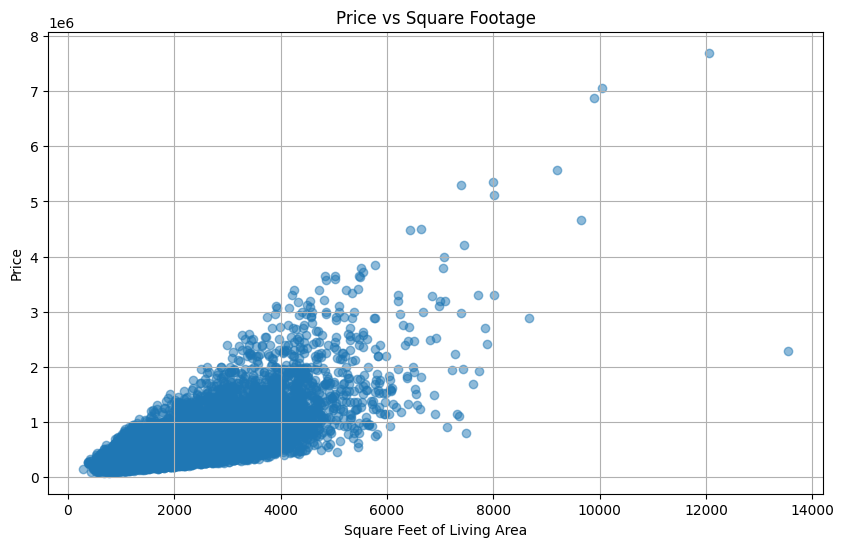

In [5]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5)
plt.xlabel("Square Feet of Living Area")
plt.ylabel("Price")
plt.title("Price vs Square Footage")
plt.grid(True)
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data for sklearn
X = df[['sqft_living']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: -43580.743094473146
Slope: 280.62356789744786


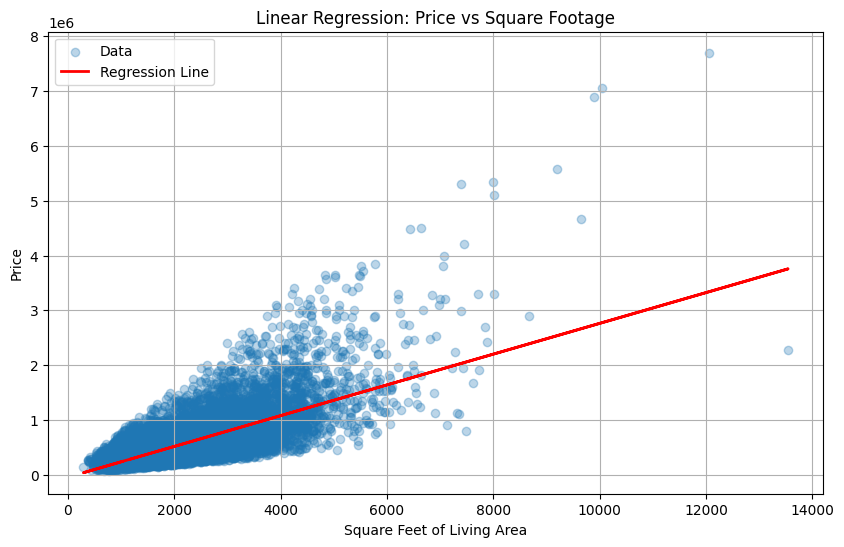

In [7]:
# Plot the scatter and regression line
plt.figure(figsize=(10,6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.3, label='Data')
plt.plot(df['sqft_living'], model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel("Square Feet of Living Area")
plt.ylabel("Price")
plt.title("Linear Regression: Price vs Square Footage")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\X1 CARBON TOUCH\Desktop\Introduction to Data Science with Jupyter Notebook\kc_house_data.csv")

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
target = "price"

X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R² score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² Score (Linear Regression):", r2)

R² Score (Linear Regression): 0.646025927213763


In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\X1 CARBON TOUCH\Desktop\Introduction to Data Science with Jupyter Notebook\kc_house_data.csv")

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
target = "price"

X = df[features]
y = df[target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear_model', LinearRegression())
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² Score (Polynomial + Linear Regression):", r2)

R² Score (Polynomial + Linear Regression): 0.7594076889184056


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# Load dataset
#df = pd.read_csv("kc_house_data.csv")

# Define features and target
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
target = "price"

X = df[features]
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print("R² Score (Ridge Regression):", ridge_r2)

R² Score (Ridge Regression): 0.6460194468601675


In [13]:
### TASK 2: Ridge + 2nd-Order Polynomial
### ----------------------------------------
# Create pipeline: Standardize → Polynomial → Ridge
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge(alpha=0.1))
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
poly_pred = pipeline.predict(X_test)
poly_r2 = r2_score(y_test, poly_pred)
print("R² Score (Polynomial Ridge Regression):", poly_r2)

R² Score (Polynomial Ridge Regression): 0.7635743666564346
